# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

641

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty city list
city_list = []

# Initialize values
set_count = 1 
record_count = 1

# Start the loop
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = url + "&q=" + city
    print(f'Processing record {record_count} of set {set_count} | {city}')
    
    record_count += 1
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the lat, lng, max temp, humidity, cloudiness, wind speed, country, date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humd = city_weather["main"]["humidity"]
        city_cloud = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_list.append({'City':city,
                          'Lat': city_lat, 
                          'Lng': city_lng,
                          'Max Temp': city_temp, 
                          'Humidity': city_humd,
                          'Cloudiness': city_cloud, 
                          'Wind Speed': city_wind, 
                          'Country': city_country,
                          'Date': city_date
        })
    except:
        print("City not found. Skipping...")
        pass
        
print('------------------------')
print('Data Retrieval Complete ')
print('------------------------')

Processing record 1 of set 1 | bluff
Processing record 2 of set 1 | rikitea
Processing record 3 of set 1 | san patricio
Processing record 4 of set 1 | tuatapere
Processing record 5 of set 1 | batagay
Processing record 6 of set 1 | grand-santi
Processing record 7 of set 1 | cidreira
Processing record 8 of set 1 | punta arenas
Processing record 9 of set 1 | masty
Processing record 10 of set 1 | shimoda
Processing record 11 of set 1 | puerto ayora
Processing record 12 of set 1 | attawapiskat
City not found. Skipping...
Processing record 13 of set 1 | georgetown
Processing record 14 of set 1 | labuhan
Processing record 15 of set 1 | urusha
Processing record 16 of set 1 | cabo san lucas
Processing record 17 of set 1 | belushya guba
City not found. Skipping...
Processing record 18 of set 1 | landerneau
Processing record 19 of set 1 | hilo
Processing record 20 of set 1 | mataura
Processing record 21 of set 1 | souillac
Processing record 22 of set 1 | port alfred
Processing record 23 of set 1 

Processing record 41 of set 4 | aktash
Processing record 42 of set 4 | ngukurr
City not found. Skipping...
Processing record 43 of set 4 | snyder
Processing record 44 of set 4 | juneau
Processing record 45 of set 4 | sumenep
Processing record 46 of set 4 | salalah
Processing record 47 of set 4 | pilani
Processing record 48 of set 4 | burkhala
City not found. Skipping...
Processing record 49 of set 4 | dubbo
Processing record 0 of set 5 | beringovskiy
Processing record 1 of set 5 | darhan
Processing record 2 of set 5 | phalombe
Processing record 3 of set 5 | sentyabrskiy
City not found. Skipping...
Processing record 4 of set 5 | illertissen
Processing record 5 of set 5 | sitka
Processing record 6 of set 5 | tsihombe
City not found. Skipping...
Processing record 7 of set 5 | chunskiy
Processing record 8 of set 5 | acajutla
Processing record 9 of set 5 | nizhneyansk
City not found. Skipping...
Processing record 10 of set 5 | cayenne
Processing record 11 of set 5 | thilogne
City not found.

Processing record 24 of set 8 | puerto del rosario
Processing record 25 of set 8 | los llanos de aridane
Processing record 26 of set 8 | rio gallegos
Processing record 27 of set 8 | sendai
Processing record 28 of set 8 | coihaique
Processing record 29 of set 8 | aripuana
Processing record 30 of set 8 | kloulklubed
Processing record 31 of set 8 | jacareacanga
Processing record 32 of set 8 | chipinge
Processing record 33 of set 8 | hasaki
Processing record 34 of set 8 | rincon
Processing record 35 of set 8 | broome
Processing record 36 of set 8 | trairi
Processing record 37 of set 8 | padang
Processing record 38 of set 8 | aykhal
Processing record 39 of set 8 | vanimo
Processing record 40 of set 8 | haren
Processing record 41 of set 8 | kolokani
Processing record 42 of set 8 | beloha
Processing record 43 of set 8 | voh
Processing record 44 of set 8 | palana
Processing record 45 of set 8 | samarai
Processing record 46 of set 8 | carutapera
Processing record 47 of set 8 | sankt wendel
Proc

Processing record 14 of set 12 | lavrentiya
Processing record 15 of set 12 | fougamou
Processing record 16 of set 12 | kayerkan
Processing record 17 of set 12 | presidente medici
Processing record 18 of set 12 | waingapu
Processing record 19 of set 12 | mecca
Processing record 20 of set 12 | sakakah
Processing record 21 of set 12 | semey
Processing record 22 of set 12 | rumoi
Processing record 23 of set 12 | mananara
Processing record 24 of set 12 | houma
Processing record 25 of set 12 | simao
Processing record 26 of set 12 | mullaitivu
City not found. Skipping...
Processing record 27 of set 12 | ambo
Processing record 28 of set 12 | koindu
Processing record 29 of set 12 | bria
Processing record 30 of set 12 | xining
Processing record 31 of set 12 | ambulu
Processing record 32 of set 12 | valparaiso
Processing record 33 of set 12 | oussouye
Processing record 34 of set 12 | kingman
Processing record 35 of set 12 | port hardy
Processing record 36 of set 12 | sheopur
Processing record 37 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_list_df = pd.DataFrame(city_list)
city_list_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,63.55,69,12,11.21,NZ,1610502336
1,rikitea,-23.1203,-134.9692,77.99,78,3,16.73,PF,1610502336
2,san patricio,28.0170,-97.5169,44.60,70,90,4.61,US,1610502336
3,tuatapere,-46.1333,167.6833,75.22,43,0,3.51,NZ,1610502336
4,batagay,67.6333,134.6333,-43.56,71,1,1.63,RU,1610502337
5,grand-santi,4.2500,-54.3833,72.00,97,100,2.24,GF,1610502337
6,cidreira,-30.1811,-50.2056,72.57,80,100,14.07,BR,1610502337
7,punta arenas,-53.1500,-70.9167,48.20,53,20,17.27,CL,1610502337
8,masty,53.4122,24.5387,27.88,98,100,11.01,BY,1610502338
9,shimoda,34.6667,138.9500,51.80,54,20,5.75,JP,1610502338


In [5]:
city_list_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,21.272717,18.067976,48.164055,73.948893,55.930153,7.860988,1.610502e+09
std,33.015452,91.107897,31.740707,19.443296,41.198018,6.028132,8.011969e+01
min,-54.800000,-179.166700,-43.560000,13.000000,0.000000,0.250000,1.610502e+09
25%,-3.486150,-65.306250,30.200000,64.000000,1.000000,3.440000,1.610502e+09
50%,28.122700,19.371400,57.000000,79.000000,75.000000,6.290000,1.610502e+09
75%,48.299000,101.370750,74.345000,87.500000,97.000000,11.060000,1.610502e+09
max,78.218600,179.316700,103.690000,100.000000,100.000000,43.730000,1.610503e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get the indices of cities that have humidity over 100%.
city_high_humid = city_list_df[city_list_df['Humidity'] > 100].index
city_high_humid

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_list_df.drop(city_high_humid, inplace=False)
clean_city_data.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,63.55,69,12,11.21,NZ,1610502336
1,rikitea,-23.1203,-134.9692,77.99,78,3,16.73,PF,1610502336
2,san patricio,28.0170,-97.5169,44.60,70,90,4.61,US,1610502336
3,tuatapere,-46.1333,167.6833,75.22,43,0,3.51,NZ,1610502336
4,batagay,67.6333,134.6333,-43.56,71,1,1.63,RU,1610502337
5,grand-santi,4.2500,-54.3833,72.00,97,100,2.24,GF,1610502337
6,cidreira,-30.1811,-50.2056,72.57,80,100,14.07,BR,1610502337
7,punta arenas,-53.1500,-70.9167,48.20,53,20,17.27,CL,1610502337
8,masty,53.4122,24.5387,27.88,98,100,11.01,BY,1610502338
9,shimoda,34.6667,138.9500,51.80,54,20,5.75,JP,1610502338


In [8]:
clean_city_data.to_csv('clean city data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

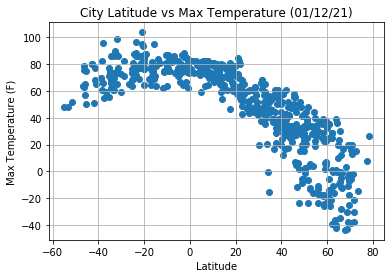

In [11]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.title('City Latitude vs Max Temperature (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('output_data/figure1.png')
plt.show()

## Latitude vs. Humidity Plot

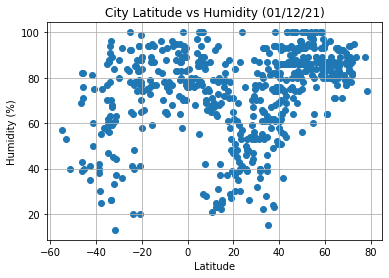

In [12]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title('City Latitude vs Humidity (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('output_data/figure2.png')
plt.show()

## Latitude vs. Cloudiness Plot

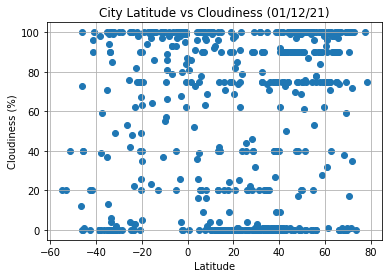

In [13]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.title('City Latitude vs Cloudiness (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('output_data/figure3.png')
plt.show()

## Latitude vs. Wind Speed Plot

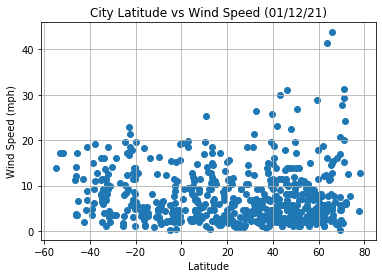

In [14]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.title('City Latitude vs Wind Speed (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('output_data/figure4.png')
plt.show()

## Linear Regression

The r-value is: 0.6195753660355043


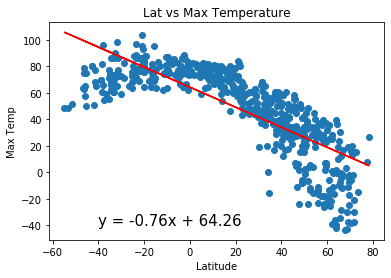

In [15]:
# y = ax + b (R2: the percentage of the data are explained by the function)
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40,-40), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Lat vs Max Temperature")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure5.png')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x = clean_city_data['City']
y = clean_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x('southern hemisphere'), y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (0,50), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure6.png')
plt.show()

The r-value is: 0.6082708688906918


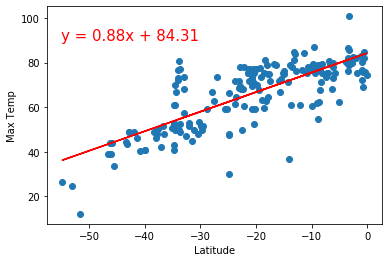

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x = clean_city_data['City']
y = clean_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x('northern hemisphere'), y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (0,50), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure7.png')
plt.show()

The r-value is: 0.000543987878808455


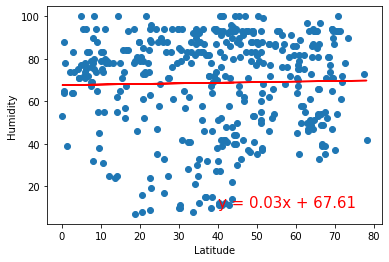

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


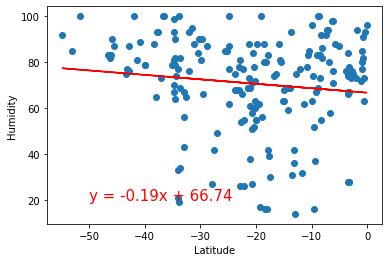

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


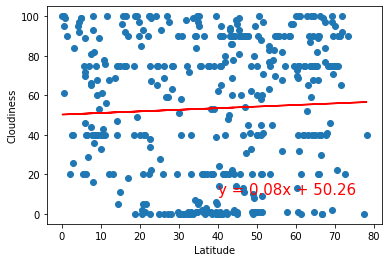

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


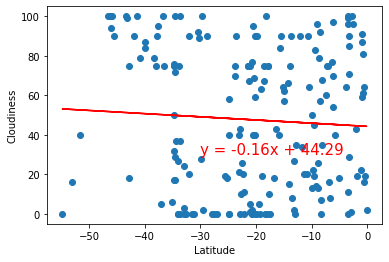

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


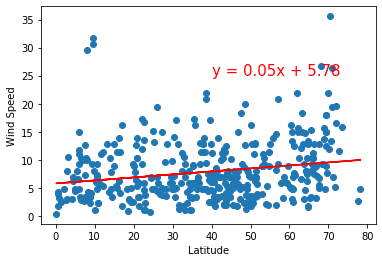

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


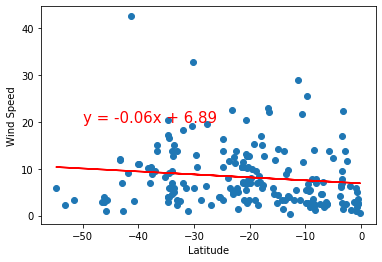